In [76]:
#import neccessary modules 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted



In [2]:
#load csv files
train = pd.read_csv('C:/Users/Yusuf/Desktop/Portfolio Project/walmart/train.csv')
test = pd.read_csv('C:/Users/Yusuf/Desktop/Portfolio Project/walmart/test.csv')
features = pd.read_csv('C:/Users/Yusuf/Desktop/Portfolio Project/walmart/features.csv')
store = pd.read_csv('C:/Users/Yusuf/Desktop/Portfolio Project/walmart/stores.csv')
submission = pd.read_csv('C:/Users/Yusuf/Desktop/Portfolio Project/walmart/sampleSubmission.csv')

In [3]:
#Data inspection and manipulation
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
train.shape

(421570, 5)

In [7]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [8]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [9]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [10]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [11]:
features.shape

(8190, 12)

In [12]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [13]:
store.shape

(45, 3)

In [14]:
#Data Cleaning and Manipulation
#check for missing values
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [15]:
store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [16]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [17]:
print(train.shape)
features.shape

(421570, 5)


(8190, 12)

In [18]:
df = train.merge(features).merge(store)

In [19]:
df.shape

(421570, 16)

In [20]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [21]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [22]:
df.shape

(421570, 16)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [84]:
#converting date column to date datatype
df['Date'] = pd.to_datetime(df['Date'])



In [91]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.week

<ipython-input-91-b256aed86a4e>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Date'].dt.week


In [100]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Day,Week
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,151315,2010,2,5,5
2,1,3,2010-02-05,13740.12,42.31,2.572,211.096358,8.106,151315,2010,2,5,5
3,1,4,2010-02-05,39954.04,42.31,2.572,211.096358,8.106,151315,2010,2,5,5
4,1,5,2010-02-05,32229.38,42.31,2.572,211.096358,8.106,151315,2010,2,5,5
5,1,6,2010-02-05,5749.03,42.31,2.572,211.096358,8.106,151315,2010,2,5,5


In [93]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Size            0
Year            0
Month           0
Day             0
Week            0
dtype: int64

In [26]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


Explanatory Data Analysis(EDA)

In [27]:
#No of stores available
print("No of stores available", df.Store.nunique())
print(df.Store.unique())

No of stores available 45
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [28]:
#No of dept available
print("No of Dept. available", df.Dept.nunique())
print("List of available dept.", (df.Dept.unique()))


No of Dept. available 81
List of available dept. [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 79 80 81 82 83 85 87 90 91 92 93 94 95 97
 98 78 96 99 77 39 50 43 65]


In [29]:
#Type of stores available
print("No of type of stores available:", df.Type.nunique())
print("List of available stores", (df.Type.unique()))

No of type of stores available: 3
List of available stores ['A' 'B' 'C']


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [31]:
df.Size.unique()

array([151315, 202307,  37392, 205863,  34875, 202505,  70713, 155078,
       125833, 126512, 207499, 112238, 219622, 200898, 123737,  57197,
        93188, 120653, 203819, 203742, 140167, 119557, 114533, 128107,
       152513, 204184, 206302,  93638,  42988, 203750, 203007,  39690,
       158114, 103681,  39910, 184109, 155083, 196321,  41062, 118221],
      dtype=int64)

In [32]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [33]:
numerical = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']]
categorical = ['Store', 'Dept', 'Date', 'IsHoliday', 'Type']

In [34]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


Which stores has the highest number of frequency 

Text(0.5, 1.0, 'No of Stores')

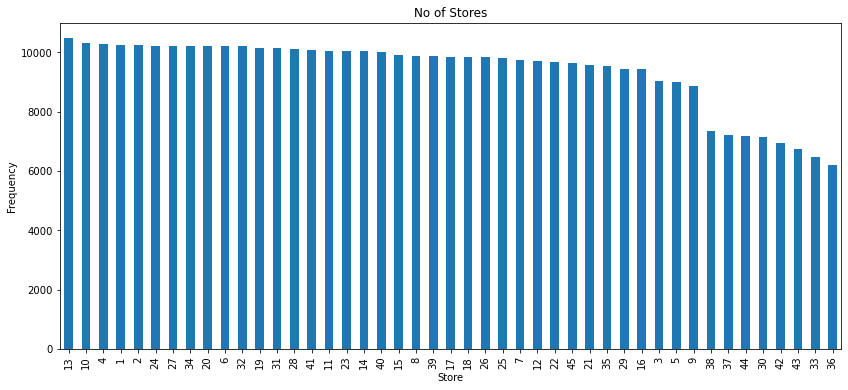

In [35]:
fig = plt.figure(figsize=(14, 6))
df["Store"].value_counts().plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Frequency')
plt.title("No of Stores")

Which type is the most commonnest store type

Text(0, 0.5, 'No of Types')

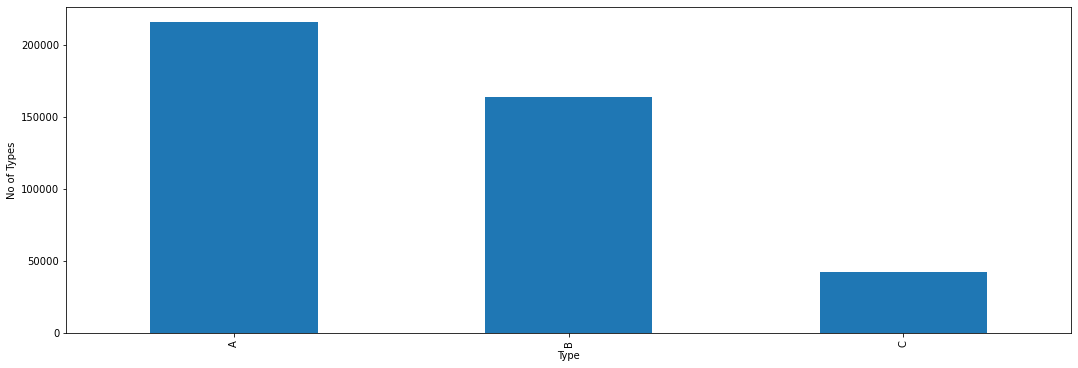

In [36]:
fig = plt.figure(figsize=(18, 6))
df["Type"].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('No of Types')  

Insights

A is the most common store type

<AxesSubplot:xlabel='Store'>

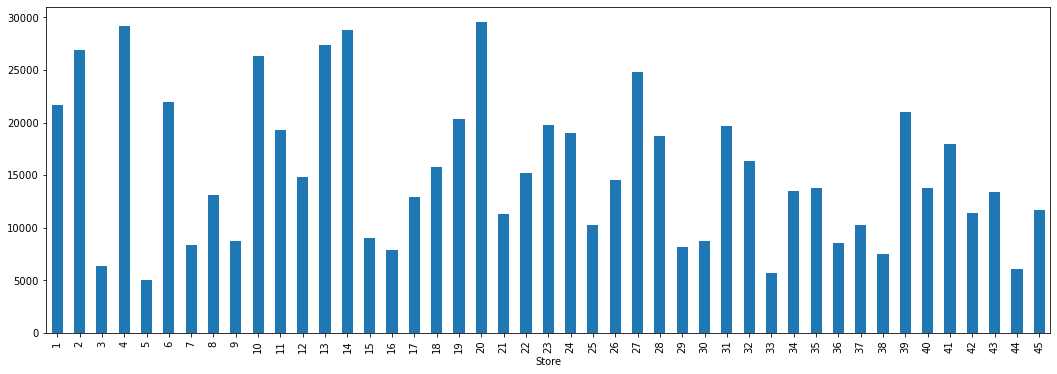

In [37]:
fig = plt.figure(figsize=(18, 6))
df.groupby('Store')['Weekly_Sales'].mean().plot(kind='bar')

#which store and type has the highest sales
What is the average size of each store and type

<AxesSubplot:xlabel='Store'>

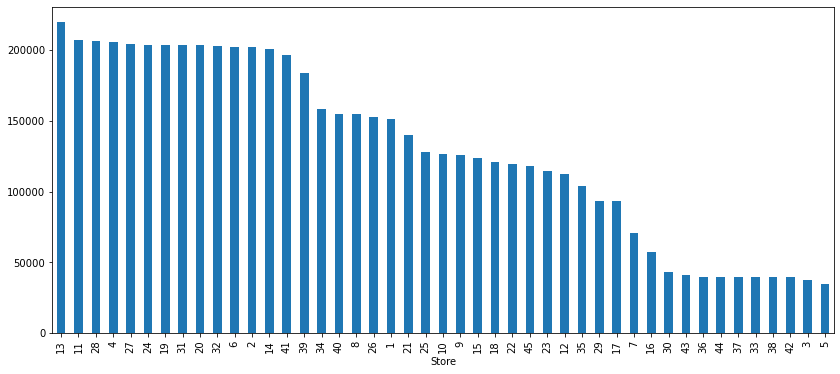

In [38]:
fig = plt.figure(figsize=(14, 6))
df.groupby('Store')['Size'].mean().sort_values(ascending=False).plot(kind='bar')

Type
A    182231.285486
B    101818.735827
C     40535.725286
Name: Size, dtype: float64

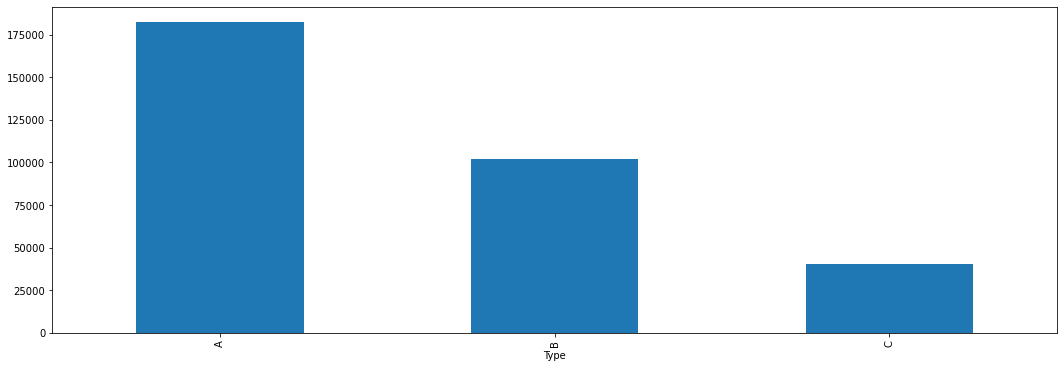

In [39]:
fig = plt.figure(figsize=(18, 6))
df.groupby('Type')['Size'].mean().plot(kind='bar')
df.groupby('Type')['Size'].mean()

Highest sales per store

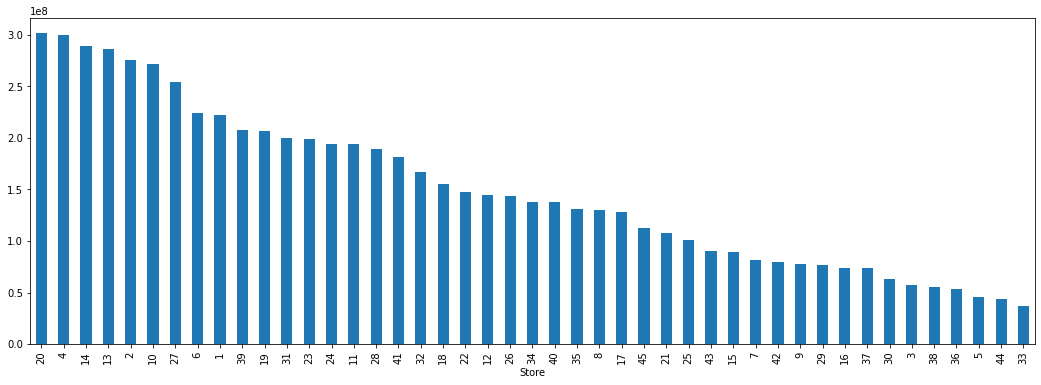

In [40]:
fig = plt.figure(figsize=(18, 6))
df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar');

<AxesSubplot:ylabel='Weekly_Sales'>

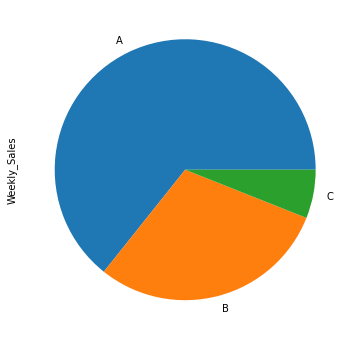

In [41]:
fig = plt.figure(figsize=(18, 6))
df.groupby('Type')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='pie')

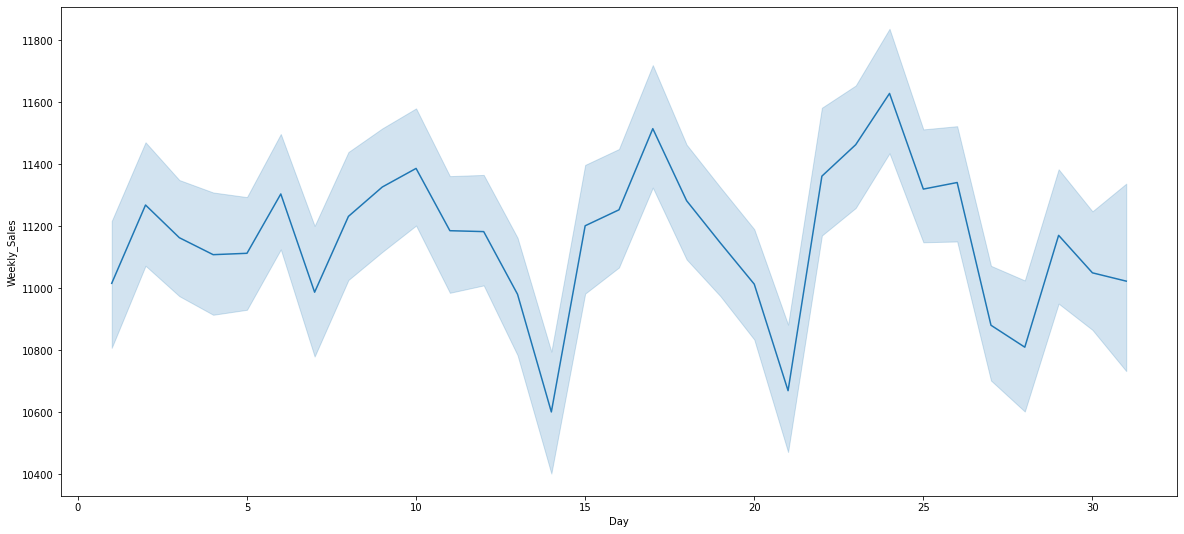

In [117]:
#fig = plt.figure(figsize=(14,6))
#plt.bar(df['Day'], df['Weekly_Sales'])

plt.figure(figsize=(20,9))
sns.lineplot(data = df, x=df['Day'], y=df['Weekly_Sales'])

#plt.plot(xpoints, ypoints)
plt.show()

In [ ]:
plt.figure(figsize=(20,9))
plt.bar( x=df['Year'], height=df['Weekly_Sales'])

<BarContainer object of 337256 artists>

<AxesSubplot:xlabel='Week', ylabel='Weekly_Sales'>

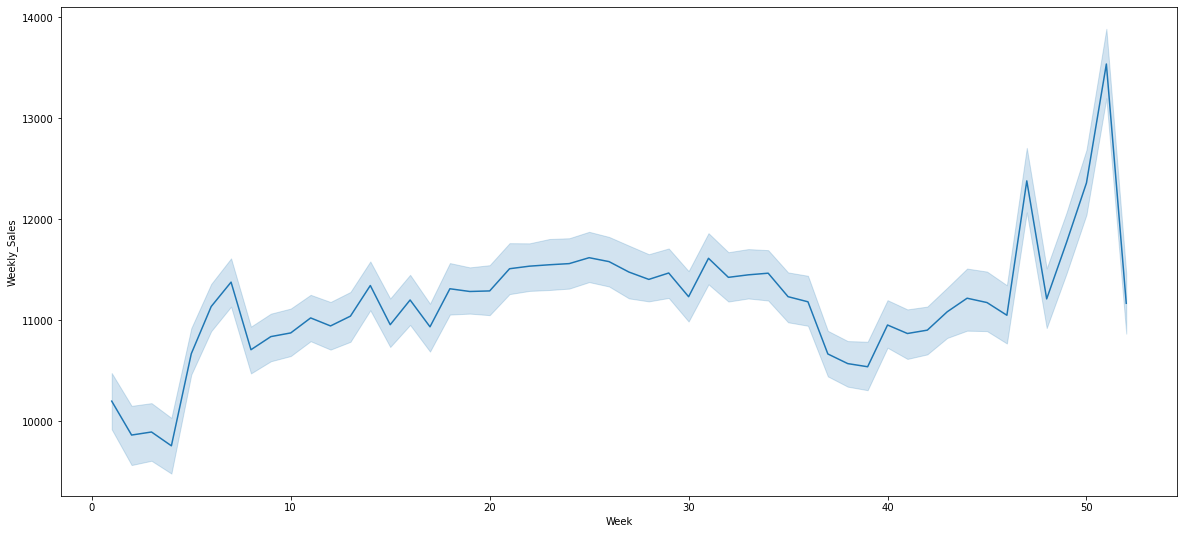

In [118]:
plt.figure(figsize=(20,9))
sns.lineplot(data = df, x=df['Week'], y=df['Weekly_Sales'])

<AxesSubplot:xlabel='Year', ylabel='Weekly_Sales'>

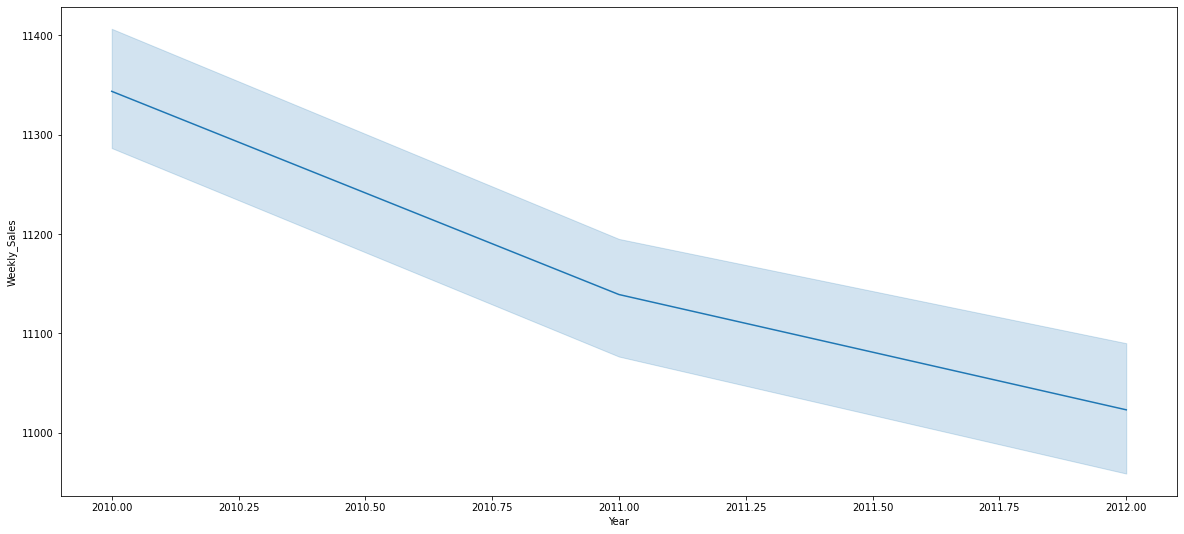

In [121]:
plt.figure(figsize=(20,9))
sns.lineplot(data = df, x=df['Year'], y=df['Weekly_Sales'])

In [42]:
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']
df[numeric_features + ['Weekly_Sales']].describe()

,Temperature,Fuel_Price,CPI,Unemployment,Size,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,60.090059,3.361027,171.201947,7.960289,136727.915739,15981.258123
std,18.447931,0.458515,39.159276,1.863296,60980.583328,22711.183519
min,-2.060000,2.472000,126.064000,3.879000,34875.000000,-4988.940000
25%,46.680000,2.933000,132.022667,6.891000,93638.000000,2079.650000
50%,62.090000,3.452000,182.318780,7.866000,140167.000000,7612.030000
75%,74.280000,3.738000,212.416993,8.572000,202505.000000,20205.852500
max,100.140000,4.468000,227.232807,14.313000,219622.000000,693099.360000


In [43]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


<ipython-input-44-865c968ff466>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


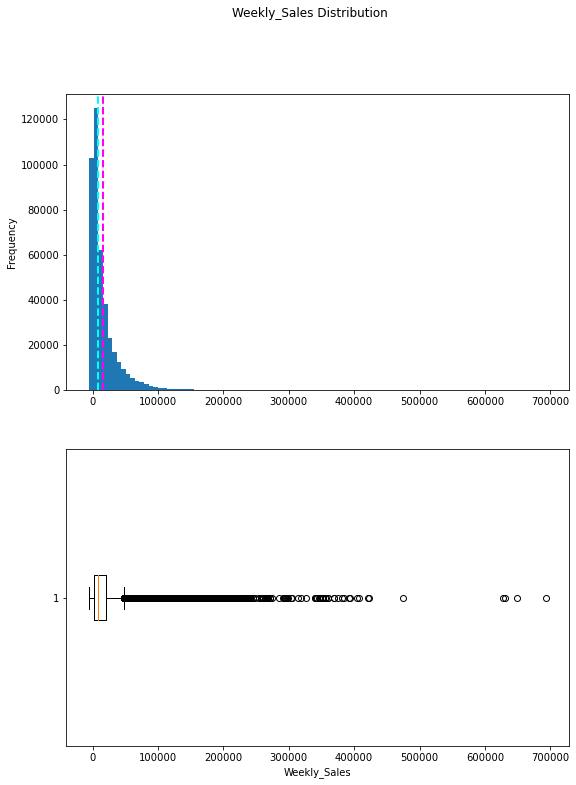

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the Target column
Target = df['Weekly_Sales']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(Target, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(Target.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(Target.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(Target, vert=False)
ax[1].set_xlabel('Weekly_Sales')

# Add a title to the Figure
fig.suptitle('Weekly_Sales Distribution')

# Show the figure
fig.show()


In [45]:
df = train.merge(features).merge(store)

In [46]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [47]:
#remove the top and bottom 10%
low, high = df['Weekly_Sales'].quantile([0.1, 0.9])
Weekly_Sales = df['Weekly_Sales'].between(low, high)

In [48]:
df = df[Weekly_Sales]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337256 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         337256 non-null  int64  
 1   Dept          337256 non-null  int64  
 2   Date          337256 non-null  object 
 3   Weekly_Sales  337256 non-null  float64
 4   IsHoliday     337256 non-null  bool   
 5   Temperature   337256 non-null  float64
 6   Fuel_Price    337256 non-null  float64
 7   MarkDown1     119795 non-null  float64
 8   MarkDown2     89803 non-null   float64
 9   MarkDown3     109564 non-null  float64
 10  MarkDown4     109988 non-null  float64
 11  MarkDown5     120258 non-null  float64
 12  CPI           337256 non-null  float64
 13  Unemployment  337256 non-null  float64
 14  Type          337256 non-null  object 
 15  Size          337256 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 41.5+ MB


remove columns that are more than 50% null

In [50]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       217461
MarkDown2       247453
MarkDown3       227692
MarkDown4       227268
MarkDown5       216998
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [51]:
df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace = True)

In [52]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315
5,1,6,2010-02-05,5749.03,False,42.31,2.572,211.096358,8.106,A,151315


In [53]:
numerical = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']
categorical = ['Store', 'Dept', 'Date', 'IsHoliday', 'Type']

In [54]:
#drop high and low cardinality categorical features.

In [55]:
df[categorical].nunique()

Store         45
Dept          76
Date         143
IsHoliday      2
Type           3
dtype: int64

In [56]:
df.drop(['IsHoliday', 'Type'], axis=1, inplace=True)

In [57]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,151315
2,1,3,2010-02-05,13740.12,42.31,2.572,211.096358,8.106,151315
3,1,4,2010-02-05,39954.04,42.31,2.572,211.096358,8.106,151315
4,1,5,2010-02-05,32229.38,42.31,2.572,211.096358,8.106,151315
5,1,6,2010-02-05,5749.03,42.31,2.572,211.096358,8.106,151315


check for correlation

In [58]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Size              int64
dtype: object

<AxesSubplot:>

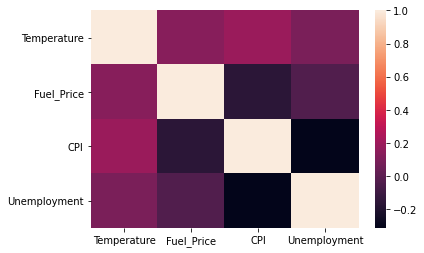

In [59]:
corr = df.select_dtypes(include ='float64').drop("Weekly_Sales", axis=1).corr()
#sns.heatmap(corr)
#corr = df[numerical].corr()
sns.heatmap(corr)

In [60]:
corr

,Temperature,Fuel_Price,CPI,Unemployment
Temperature,1.000000,0.136152,0.191557,0.092593
Fuel_Price,0.136152,1.000000,-0.160693,-0.031637
CPI,0.191557,-0.160693,1.000000,-0.313795
Unemployment,0.092593,-0.031637,-0.313795,1.000000


Split data

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [62]:
X = df.drop(['Weekly_Sales', 'Date'], axis=1)
y = df['Weekly_Sales']

In [63]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [64]:
X_train.shape

(236079, 7)

In [65]:
y_train.shape

(236079,)

In [66]:
X_test.shape

(101177, 7)

In [67]:
y_test.shape

(101177,)

In [68]:
X_train

,Store,Dept,Temperature,Fuel_Price,CPI,Unemployment,Size
118810,13,16,53.11,2.908,126.160226,8.107,219622
311094,32,35,28.99,3.077,196.733052,8.256,203007
306894,32,44,29.97,2.742,191.012180,9.137,203007
296572,31,26,60.95,2.728,211.660898,8.163,203750
246904,26,4,9.55,2.788,131.527903,8.488,152513
...,...,...,...,...,...,...,...
150301,16,36,54.29,2.745,190.776322,6.986,57197
377177,40,18,51.61,3.618,136.501774,4.420,155083
185579,19,14,55.33,4.055,138.088267,8.150,203819
145055,15,10,30.24,3.585,136.698129,7.943,123737


Build Model

In [69]:
#Baseline model

y_mean = y_train.mean()
y_baseline_pred = [y_mean] * len(y_train)

In [70]:
mean_absolute_error(y_train, y_baseline_pred)

8411.144072334264

In [71]:
print("Mean apt price:", y_train.mean())

print("Baseline MAE:", mean_absolute_error(y_train, y_baseline_pred))

Mean apt price: 11172.70898483139
Baseline MAE: 8411.144072334264


In [72]:
model = make_pipeline(
    Normalizer(),
    LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer()),
                ('linearregression', LinearRegression())])

In [73]:
predictions = pd.Series(model.predict(X_test))

In [74]:
#np.set_printoptions(suppress=True)
#print('Predicted labels: ', np.round(predictions)[:10])
#print('Actual labels   : ' ,y_test[:10])

MSE: 104961723.71904023
RMSE: 10245.082904449346
R2: 0.03706720155584764


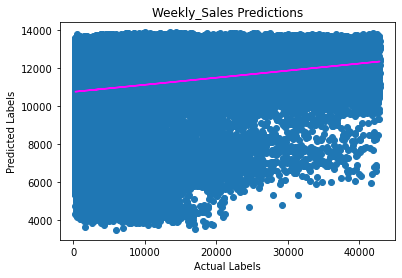

In [77]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)


# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Weekly_Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Try Lasso Regression

In [78]:
model = make_pipeline(
    Normalizer(),
    Lasso()
)

# Fit a lasso model on the training set
model.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer()), ('lasso', Lasso())])

MSE: 106727255.03476928
RMSE: 10330.888395233456
R2: 0.020869982699700418


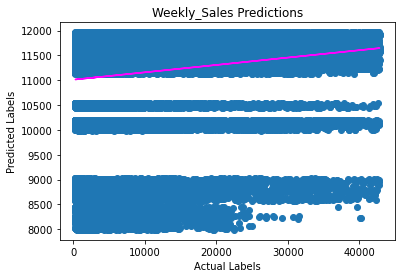

In [79]:
from sklearn.linear_model import Lasso


# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Weekly_Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Ridge regression

In [80]:
model = make_pipeline(
    Normalizer(),
    Ridge()
)

# Fit a lasso model on the training set
model.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer()), ('ridge', Ridge())])

MSE: 107421022.63191052
RMSE: 10364.411349995258
R2: 0.01450526659068041


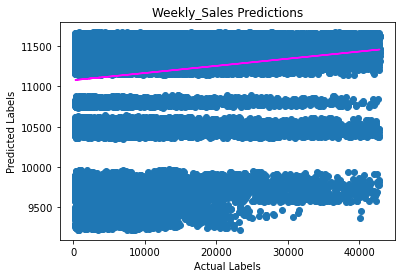

In [81]:
from sklearn.linear_model import Ridge

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Weekly_Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

DecisionTreeRegressor

In [82]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.tree import export_text

# Train the model

model = make_pipeline(
    Normalizer(),
    DecisionTreeRegressor()
)


# Fit a lasso model on the training set
model.fit(X_train, y_train)


# Visualize the model tree
#tree = export_text(model)
#print(tree)

#Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE: {:.2f}".format(rmse))
r2_score = r2_score(y_test, predictions)
print("R2_SCORE: {:2f}".format(r2_score))


MSE: 11189540.242419412
RMSE: 3345.08
R2_SCORE: 0.897346


In [83]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Weekly_Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 6149699.837592584
RMSE: 2479.8588342066137


TypeError: 'numpy.float64' object is not callable

In [ ]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a GradientBoostingRegressor model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Weekly_Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()